In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("blogs.csv",encoding = "ISO-8859-1")
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
data.isna().sum()

,0
Data,0
Labels,0


In [7]:
data['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


## Data Cleaning

In [8]:
import re # regular expression used to replace the Data
import string
def clean_Data(Data):
    '''Make Data lowercase, remove Data in square brackets, remove punctuation and remove words containing numbers.'''
    Data = Data.lower()
    Data = re.sub('\[.*?\]', '', Data)
    Data = re.sub('[%s]' % re.escape(string.punctuation), '', Data)
    Data = re.sub('\w*\d\w*', '', Data)
    Data = re.sub("[0-9" "]+"," ",Data)
    Data = re.sub('[‘’“”…]', '', Data)
    return Data

clean = lambda x: clean_Data(x)

In [9]:
data['Data'] = data.Data.apply(clean)
data.Data

,Data
0,path \nfrom frank odwyer\nnewsgroups altathei...
1,newsgroups altatheism\npath \nfrom bilokcforum...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...
...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...


In [10]:
#checking frequency
freq = pd.Series(''.join(data['Data']).split()).value_counts()[:30]
freq

,count
the,26780
to,13429
of,12697
a,11214
and,10863
in,9068
i,8155
is,7970
that,7092
it,5509


In [11]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Data'] = data['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.Data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Data
0,path frank odwyer newsgroups altatheism subjec...
1,newsgroups altatheism path bilokcforumosrheedu...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path jbrownbatmanbmdtrwcom newsgroups altathei...
4,xref cantaloupesrvcscmuedu newsgroups altathei...
...,...
1995,xref cantaloupesrvcscmuedu path frank odwyer n...
1996,xref cantaloupesrvcscmuedu newsgroups talkreli...
1997,xref cantaloupesrvcscmuedu path cantaloupesrvc...
1998,xref cantaloupesrvcscmuedu path cantaloupesrvc...


In [12]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Data']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
subject,2170
lines,2086
date,2083
path,2046
newsgroups,2038
messageid,2006
organization,1979
apr,1940
gmt,1785
one,1588


In [13]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Data"])
word_freq_df = pd.DataFrame({'Data': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(50)

,Data,occurrences,frequency
0,aa,9,0.000029
1,aaa,3,0.000010
2,aaaaarrrrgh,1,0.000003
3,aaboston,1,0.000003
4,aalternate,1,0.000003
5,aaltonen,3,0.000010
6,aam,1,0.000003
7,aan,6,0.000019
8,aangegeven,1,0.000003
9,aantal,1,0.000003


In [14]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Data"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,accept,access,according,account,act,action,actions,actually,add,...,xref,yeah,year,years,yes,york,youll,young,youre,youve
0,0.0,0.053795,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045314,0.0,0.0,0.0,0.000000,0.057375
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.111891,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108118,0.000000,0.000000,...,0.000000,0.333197,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.082636,0.000000
3,0.0,0.024288,0.0,0.0,0.023592,0.025378,0.127914,0.103619,0.038420,0.000000,...,0.000000,0.000000,0.018922,0.017126,0.122754,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.227837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038814,0.000000,0.000000,0.053550,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.0,0.0,0.000000,0.042821,0.000000,0.000000,0.032413,0.000000,...,0.020945,0.000000,0.000000,0.028897,0.069042,0.0,0.0,0.0,0.033408,0.087420
1996,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071218,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1997,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096870,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1998,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.179264,0.113326,...,0.057918,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [15]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [16]:
top2_words = get_top_n2_words(data["Data"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,apr gmt,1624
1,date apr,839
2,gmt lines,728
3,messageid date,617
4,xref cantaloupesrvcscmuedu,574
...,...,...
195,think would,29
196,jesus christ,29
197,mailing list,29
198,much better,29


In [17]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [18]:
top3_words = get_top_n3_words(data["Data"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,date apr gmt,676
1,apr gmt lines,670
2,messageid date apr,452
3,gmt lines article,291
4,xref cantaloupesrvcscmuedu newsgroups,289
...,...,...
195,system organization university,15
196,computer science department,15
197,christian morality messageid,15
198,lines nntppostinghost article,15


## Word Cloud

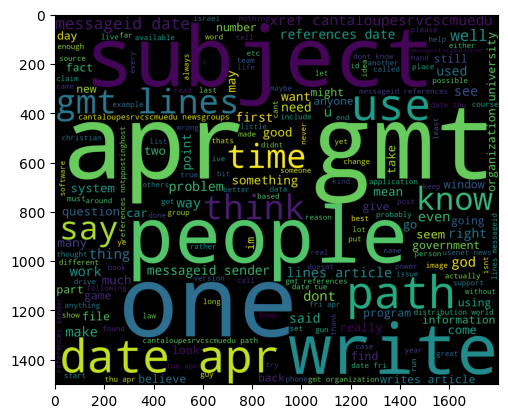

In [19]:
string_Total = " ".join(data["Data"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

## Applying Naive Bayes

In [20]:
data.head()

,Data,Labels
0,path frank odwyer newsgroups altatheism subjec...,alt.atheism
1,newsgroups altatheism path bilokcforumosrheedu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path jbrownbatmanbmdtrwcom newsgroups altathei...,alt.atheism
4,xref cantaloupesrvcscmuedu newsgroups altathei...,alt.atheism


In [21]:
def split_into_words(i):
    return (i.split(" "))


In [22]:
from sklearn.model_selection import train_test_split
email_train,email_test = train_test_split(data,test_size=0.3)
email_test

,Data,Labels
392,path cantaloupesrvcscmuedudasnewsharvardeduogi...,comp.sys.ibm.pc.hardware
1828,xref cantaloupesrvcscmuedu path broward horne ...,talk.politics.misc
677,xref cantaloupesrvcscmuedu path goldbergoasysd...,misc.forsale
1987,xref cantaloupesrvcscmuedu newsgroups talkreli...,talk.religion.misc
1686,newsgroups talkpoliticsguns path david veal su...,talk.politics.guns
...,...,...
431,newsgroups compsysmachardware path cantaloupes...,comp.sys.mac.hardware
1618,path christopher c morton newsgroups talkpolit...,talk.politics.guns
351,xref cantaloupesrvcscmuedu newsgroups composms...,comp.sys.ibm.pc.hardware
131,path cantaloupesrvcscmuedudasnewsharvardedunoc...,comp.graphics


In [23]:
# Preparing email texts into word count matrix format
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.Data)

In [24]:
# For all messages
all_emails_matrix = emails_bow.transform(data.Data)
all_emails_matrix.shape

(2000, 39214)

In [25]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.Data)
train_emails_matrix.shape

(1400, 39214)

In [26]:
# For testing messages
test_emails_matrix = emails_bow.transform(email_test.Data)
test_emails_matrix.shape

(600, 39214)

In [27]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.Labels)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.Labels)
accuracy_train_m

0.9964285714285714

In [28]:
test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.Labels)
accuracy_test_m

0.71

In [29]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.Labels.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.Labels)
accuracy_train_g

1.0

In [30]:

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.Labels)
accuracy_test_g

0.6766666666666666

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape

(1400, 39214)

In [32]:
# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape

(600, 39214)

In [33]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.Data)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.Data)
accuracy_train_m

0.9971428571428571

In [34]:
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.Data)
accuracy_test_m

0.0016666666666666668

## Sentiment Analysis

In [38]:
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [40]:
import pandas
df=pd.read_csv("blogs.csv",on_bad_lines='skip')

In [42]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [45]:
# Assuming you want to work with the "Data" column of the original DataFrame
df = pd.read_csv("blogs.csv",on_bad_lines='skip') # Read the dataframe again
df = [x.strip() for x in df.Data] # remove both the leading and the trailing characters
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False
df[0:10]

['Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK

In [47]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
one_block = df[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)#style is used for highlighters

In [48]:
one_block

'Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!uunet!olivea!hal.com!decwrl!usenet.coe.montana.edu!news.u.washington.edu!carson.u.washington.edu!jimh\nFrom: jimh@carson.u.washington.edu (James Hogan)\nNewsgroups: alt.atheism\nSubject: Re: Yet more Rushdie [Re: ISLAMIC LAW]\nKeywords: slander calumny\nMessage-ID: <1qnqlaINN4jg@shelley.u.washington.edu>\nDate: 17 Apr 93 02:39:38 GMT\nReferences: <1993Apr15.212943.15118@bnr.ca> <1993Apr16.171722.159590@zeus.calpoly.edu> <1993Apr16.222525.16024@bnr.ca>\nOrganization: University of Washington, Seattle\nLines: 60\nNNTP-Posting-Host: carson.u.washington.edu\n\nIn article <1993Apr16.222525.16024@bnr.ca> (Rashid) writes:\n>In article <1993Apr16.171722.159590@zeus.calpoly.edu>,\n>jmunch@hertz.elee.calpoly.edu (John Munch) wrote:\n>> \n>> In article <1993Apr15.212943.15118@bnr.ca> (Rashid) writes:\n>> >P.S. I\'m not sure about this but I think the charge of "shatim" also\n>> >applies to Rushdie and may be encompassed under the 

In [49]:
for token in doc_block[0:20]:
    print(token, token.pos_)#parts of speech

Path NOUN
: PUNCT
cantaloupe.srv.cs.cmu.edu!das PROPN
- PUNCT
news.harvard.edu!noc.near.net!uunet!olivea!hal.com!decwrl!usenet.coe.montana.edu!news.u.washington.edu!carson.u.washington.edu!jimh NOUN

 SPACE
From ADP
: PUNCT
jimh@carson.u.washington.edu PROPN
( PUNCT
James PROPN
Hogan PROPN
) PUNCT

 SPACE
Newsgroups NOUN
: PUNCT
alt.atheism X

 SPACE
Subject NOUN
: PUNCT


In [50]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['Keywords', 'References', 'Lines', 'Host', 'carson.u.washington.edu', 'article', 'writes', 'article', 'wrote', 'article', 'writes', 'think', 'charge', 'shatim', 'applies', 'encompassed', 'umbrella', 'ruling', 'define', 'words']


### countvectorizer

In [51]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()# to check count that word is repeated how many times

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,edu,5
1,mischief,5
2,washington,3
3,article,3
4,word,3
5,news,2
6,carson,2
7,writes,2
8,think,2
9,prophets,2


### Emotion Mining

In [63]:
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [64]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [67]:
df = pd.read_csv("blogs.csv",on_bad_lines='skip')
df = [x.strip() for x in df.Data]

In [68]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["I'd say the majority of people have a moral system that instructs them\nto kill under certain circumstances.",
 "I do get your distinction between\nmotivate and allow, and I do agree that if a flavour of theism 'allows'\natoricities, then that's an indictment of that theism.",
 "But it rather\ndepends on what the 'certain circumstances' are.",
 'When you talk about\nChristianity, or Islam, then at least your claims can be understood.',
 "It's when people go to a general statement about theism that it falls\napart.",
 'One could believe in a God which instructs one to be utterly\nharmless.',
 '#\n#|> For my part, I conclude that something\n#|> else is required.',
 'I also happen to believe that that something\n#|> else will work no less well without religion - any easy Them/Us will\n#|> do.',
 '#\n#And what does religion supply, if not an easy Them/Us?',
 'Not necessarily.']

In [69]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,"#|> \n#|> No, but it allows one to conclude th..."
2,"#\n#""Motivates"" or ""allows?"""
3,The Christian Bible says that one may kill\n#u...
4,"In fact, it instructs one to kill under\n#cert..."
...,...
33919,Any evidence to the contrary ?
33920,"Bill R.\n\n--\n\n""When up a dangerous faction ..."
33921,"To ruin, slaughter, and confound; ..."
33922,"When such a tempest shook the land,\nHow could..."


In [70]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [71]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [72]:
# test that it works
calculate_sentiment(text = 'instructs')

0

In [73]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

,word_count
0,94
1,32
2,4
3,11
4,10
5,18
6,28
7,10
8,15
9,14


In [75]:
sent_df.sort_values(by='sentiment_value').head(10)

,sentence,sentiment_value,word_count
13682,*\n *************...,-93,155
11415,>\n>Some of us aren't that fucking stupid you ...,-18,12
29204,Adam\nAdam Shostack \t\t\t\t adam@das.ha...,-18,386
21310,HOW\ncan we stand by and watch innocent people...,-17,51
509,Message-ID: <1993Apr16.032919.21117@leland.Sta...,-17,92
29922,} Elect a selfish bastard government and they ...,-16,21
23903,In a National Institute of Justice study\nof ...,-16,59
24132,Certainly accidental deaths by any cause are s...,-15,46
25984,"Read this:\n\nFrom Ma'ariv, February 18 (possi...",-14,57
25987,The State of Israel has never officially admit...,-14,46


In [74]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
14233,"I think it's important, as I ask young people ...",13,60
9713,horn buttons behind air bag in spokes and not ...,13,114
14556,:)\n\nI'm glad Grant Fuhr will never be as ove...,13,30
12849,After falling short two years in a row in exci...,14,31
25888,"Such a move would save Israeli lives,\nadvance...",15,49
19442,"Still,\nI think the profile of the person who ...",18,67
30688,"I, myself, have spent a good deal of time tryi...",18,81
14491,"Here is the scoring:\n\nPick 1st round winner,...",22,156
13725,Try these stats (taken from Playboy Magazine\n...,24,106
12983,>>Lesse:\n>> '93 offense = '92 offen...,24,56


In [76]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

,sentiment_value
count,33924.000000
mean,0.075463
std,2.013813
min,-93.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,24.000000


In [77]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0,94
1,"#|> \n#|> No, but it allows one to conclude th...",-1,32
3,The Christian Bible says that one may kill\n#u...,-2,11
4,"In fact, it instructs one to kill under\n#cert...",-2,10
5,I'd say the majority of people have a moral sy...,-2,18


In [78]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
12983,>>Lesse:\n>> '93 offense = '92 offen...,24,56
13725,Try these stats (taken from Playboy Magazine\n...,24,106
14491,"Here is the scoring:\n\nPick 1st round winner,...",22,156


In [79]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-80-b9f46bcc0099>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

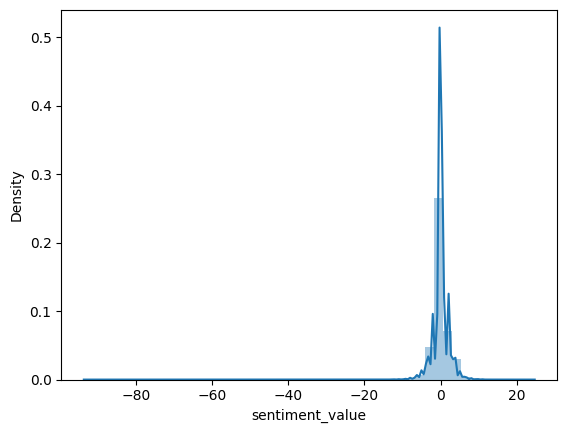

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])
#inference from graph:
# most of the reviews values are around zero

<Axes: xlabel='index', ylabel='sentiment_value'>

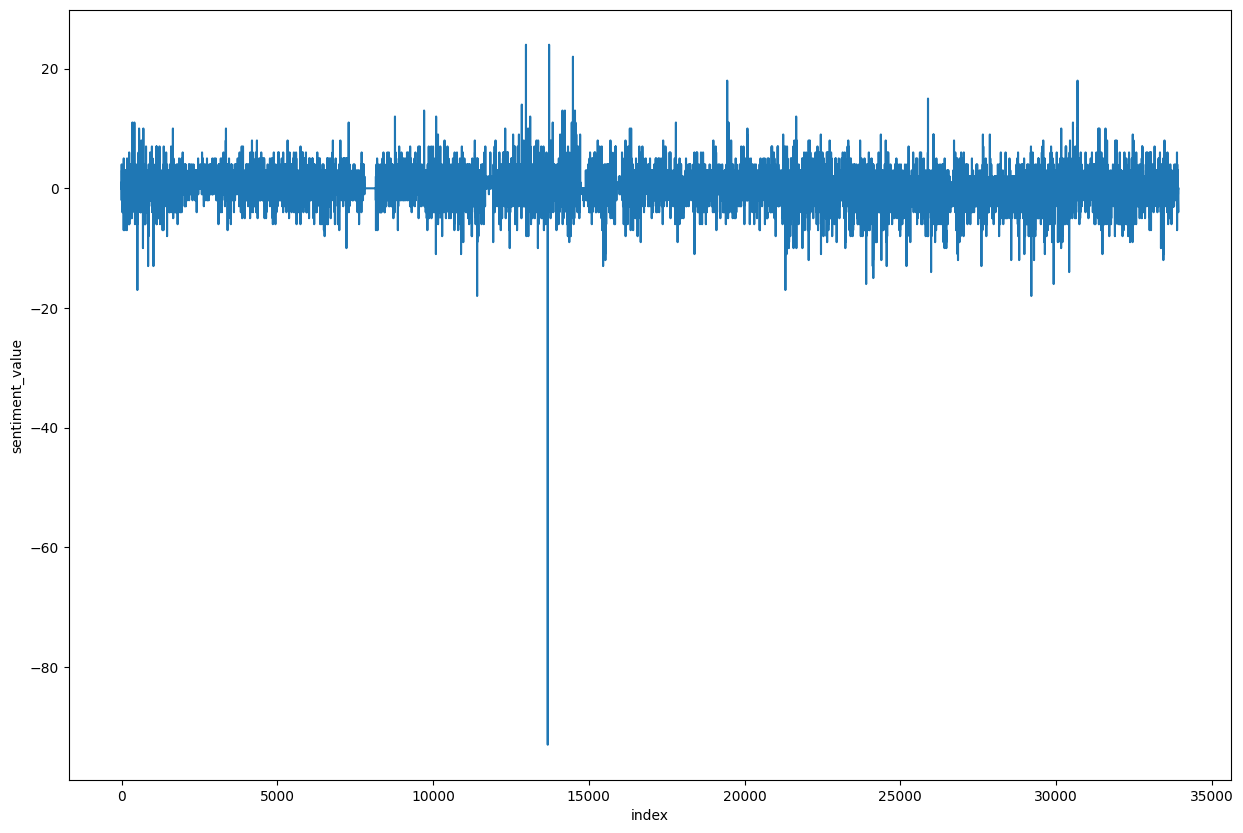

In [81]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)